# Student Sample 2

## 石晴方

## Assignment IV: Chinese Language Processing

## Question 1

The csv file `dcard-top100.csv` includes top 100 posts from Dcard, which a on-line discussion forum for school life in Taiwan. The texts are in the `content` column.

Please preprocess the data by:
- removing symbols, punctuations, emoticons or other non-linguistic symbols
- removing stopwords (Please use the stopword list provided in `demo_data/stopwords/tomlinNTUB-chinese-stopwords.txt`)
- performing word segmentation on the corpus using `ckip-transformer`
- creating a word frequency list of this tiny corpus

```{warning}
Please note that the preprocessing steps are important. Removal of characters from texts may have a lot to do with the word segmentation performance.
```

In [ ]:
## read file ##
with open("dcard-top100.csv", 'r', encoding='utf-8') as f:
    dcard = f.read().split('\n')

In [ ]:
## remove special characters ##
import re

def remove_special_characters(text):
    url = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
    pattern = r'[^a-zA-Z0-9\w]'
    
    text = re.sub(url, '', text) # remove url
    text = re.sub(pattern, '', text) # remove special characters
    
    return text

dcard_new = [remove_special_characters(sent) for sent in dcard]

In [ ]:
import ckip_transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

In [ ]:
## Initialize drivers ##

# %%time
# ws_driver = CkipWordSegmenter(level=3, device=-1)

In [ ]:
## paragraph breaks ##
text = [p for p in dcard_new if len(p) != 0]

In [ ]:
## Run pipeline ##
## Enable sentence segmentation ##
# ws = ws_driver(text, use_delim=True)
import pickle
with open('ws.pkl', 'rb') as f:
    ws = pickle.load(f)

In [ ]:
## remove stopwords ##
stopwords = [line.strip() for line in open("tomlinNTUB-chinese-stopwords.txt", 'r', encoding='utf-8').readlines()]

ws_nostopwords = []
for sent in ws:
    for w in sent:
        if w not in stopwords and len(w) >= 2: # get 雙字詞
            ws_nostopwords.append(w)

In [ ]:
## make frequency list##
def count_freq(corpus):
    word_freq = {}

    for word in corpus:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
    return word_freq

dcard_freq = count_freq(ws_nostopwords)

sorted_dcard_freq = sorted(dcard_freq.items(), key=lambda dcard_freq: dcard_freq[1], reverse = True)

In [ ]:
## build dataframe ##
import pandas as pd
dcards_df = pd.DataFrame(sorted_dcard_freq)
dcards_df.columns = ['LEMMA', 'FREQ']

In [ ]:
dcards_df[:21]

,LEMMA,FREQ
0,真的,117
1,沒有,95
2,覺得,91
3,知道,70
4,看到,68
5,現在,64
6,喜歡,56
7,朋友,54
8,一直,53
9,其實,52


## Question 2

Use `ckip-transformer` to extract all named entities and create a frequency list of the named entities.

In particular, please identify named entities of organizations (`ORG`) and geographical names (`GPE`) and provide their frequencies in the Dcard Corpus.

In [ ]:
## get ner ##
# ner = ner_driver(text, use_delim=True)
with open('ner.pkl', 'rb') as f:
    ner = pickle.load(f)

In [ ]:
matched_words = []
for sent in ner:
    for w in sent:
        if w.ner in ('ORG', 'GPE') :
            matched_words.append(w.word)

In [ ]:
## make frequency list##
dcard_ner_freq = count_freq(matched_words)
sorted_dcard_ner_freq = sorted(dcard_ner_freq.items(), key=lambda dcard_ner_freq: dcard_ner_freq[1], reverse = True)

In [ ]:
## build dataframe ##
ner_df = pd.DataFrame(sorted_dcard_ner_freq)
ner_df.columns = ['LEMMA', 'FREQ']

In [ ]:
ner_df[:21]

,LEMMA,FREQ
0,台灣,23
1,日本,16
2,台南,7
3,韓國,6
4,台,5
5,聖圭,5
6,英國,5
7,沖繩,4
8,SHINee,4
9,台中,3


## Question 3

In this exercise, please work with `spacy` for Chinese processing. (Use the model `zh_core_web_trf`)

Please process the same Dcard Corpus (from the csv file) by:

- performing the word tokenization
- identifying all nouns and verbs (i.e., words whose tags start with N or V)
- identifying all words with at least two characters
- removing all words that contain alphabets or digits
- removing all words that are included in the `stopword_list` (cf. Question 1)

Based on the above text-preprocessing criteria, your goal is to create a word frequency list and visualize the result in a Word Cloud.

```{note}
`spacy` uses the `jieba` for Chinese word segmentation. There may be more tagging errors. In the expected results presented below, I did not use any self-defined dictionary. For this exercise, please ignore any tagging errors out of the module for the moment.
```

```{tip}
Please check the module `wordcloud` for the visualization.
```

In [ ]:
import spacy
from spacy.lang.zh.examples import sentences 
nlp = spacy.load('zh_core_web_trf')

In [ ]:
## get nouns and verbs ##
# text_tagged = [nlp(sent) for sent in dcard]

# nouns_verbs = []
# for sent in text_tagged:
#     for word in sent:
#         if word.pos_ in ('VERB', 'NOUN') and len(word.text) >= 2 and re.findall(r'[a-zA-Z0-9]', word.text) == [] and word.text not in stopwords:
#             nouns_verbs.append(word.text)
        

In [ ]:
with open('text_tagged.pkl', 'rb') as f:
    text_tagged = pickle.load(f)

In [ ]:
with open('nouns_verbs.pkl', 'rb') as f:
    nouns_verbs = pickle.load(f)

In [ ]:
## make frequency list##
nouns_verbs_freq = count_freq(nouns_verbs)
sorted_nouns_verbs_freq = sorted(nouns_verbs_freq.items(), key=lambda nouns_verbs_freq: nouns_verbs_freq[1], reverse = True)

In [ ]:
## build dataframe ##
nouns_verbs_df = pd.DataFrame(sorted_nouns_verbs_freq)
nouns_verbs_df.columns = ['N-V', 'FREQ']

In [ ]:
nouns_verbs_df[:21]

,N-V,FREQ
0,知道,70
1,看到,68
2,朋友,55
3,喜歡,55
4,分享,52
5,沒有,51
6,男友,46
7,工作,41
8,時間,38
9,感覺,38


In [ ]:
## make wordcloud ##
import matplotlib
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # 製作文字雲

In [ ]:
# !wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download 下載台北思源黑體
wordcloud = WordCloud(font_path = 'taipei_sans_tc_beta.ttf', background_color='white')
wordcloud.generate_from_frequencies(frequencies = nouns_verbs_freq)

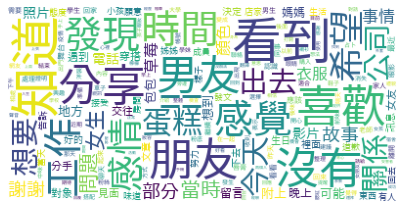

In [ ]:
plt.figure(figsize=(7,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Question 4

Following Question 3, after you process each article with `spacy`, please extract all the `subject` + `predicate` word pairs from the corpus.

To simplify the task, please extract word token pairs whose dependency relation is `nsubj`, with the predicate being the head and subject being the dependent.

- Remove words that include alphabets and digits

In [ ]:
from spacy.symbols import nsubj

sub_pred = []
for sent in text_tagged:
    for word in sent:
        if word.dep == nsubj:
            sub_pred.append(f"{word.text}_{word.head}")
        

In [ ]:
## make frequency list##
sub_pred_freq = count_freq(sub_pred)
sorted_sub_pred_freq = sorted(sub_pred_freq.items(), key=lambda sub_pred_freq: sub_pred_freq[1], reverse = True)

In [ ]:
## build dataframe ##
sub_pred_df = pd.DataFrame(sorted_sub_pred_freq)
sub_pred_df.columns = ['SUBJ-PRED', 'FREQ']

In [ ]:
sub_pred_df[:21]

,SUBJ-PRED,FREQ
0,我_喜歡,21
1,我_想,20
2,他_說,19
3,我_覺,19
4,我_知道,16
5,我_看,12
6,我_看到,12
7,我_用,10
8,我_說,9
9,我_愛,9
